In [2]:
import numpy as np
import cv2
from copy import deepcopy
from PIL import Image

In [3]:
path = r"D:\tapway\testcase\cropped-lp1-20200715-104935131Z.jpg"

In [4]:
img = cv2.imread(path)

In [5]:
cv2.imshow("Original Image",img)
cv2.waitKey(0)

-1

In [6]:
imgsize = cv2.resize(img, (300, 200), interpolation = cv2.INTER_CUBIC)
cv2.imshow("Resize Image",imgsize)
cv2.waitKey(0)

-1

In [7]:
gray = cv2.cvtColor(imgsize, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray Image",gray)
cv2.waitKey(0)

-1

In [8]:
thresh = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 15)
cv2.imshow("binirization Image",thresh)
cv2.waitKey(0)

-1

In [9]:
# sharp = cv2.Canny(blur, 30, 200)
sharp = cv2.bilateralFilter(thresh, 105, 15, 35) 
cv2.imshow("sharp Image",sharp)
cv2.waitKey(0)

-1

In [11]:
# blur = cv2.medianBlur(gray, 3)
blur=cv2.GaussianBlur(sharp, (3,3), 1)
cv2.imshow("deblur Image",blur)
cv2.waitKey(0)

-1

In [12]:
# imgBlurred = cv2.GaussianBlur(gray, (3,3), 0)
# imgBlurred = cv2.bilateralFilter(imgBlurred, 13, 15, 15) 
sobelx = cv2.Sobel(blur,cv2.CV_8U,1,0,ksize=3)
cv2.imshow("deblur Image",sobelx)
cv2.waitKey(0)
ret2,threshold_img = cv2.threshold(blur,0,250,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow("deblur Image",threshold_img)
cv2.waitKey(0)
cv2.imwrite('new.png', threshold_img)


True

In [27]:
from tesserocr import PyTessBaseAPI , RIL
import tesserocr
api = PyTessBaseAPI(lang='eng', psm=tesserocr.PSM.SINGLE_BLOCK)
api.SetImageFile('new1.tif')
print ( "OCR Process begin .....")
# start_time = time.time()
api.SetVariable("tessedit_char_whitelist", "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789")
b = api.GetUTF8Text()
b

OCR Process begin .....


''

In [29]:
def linelocate (path):
    tableline = []
#     img = improve(path)
#     parent_folder = os.path.dirname(os.path.abspath(path))
#     img_out = os.path.join(parent_folder, "img.png")
#     cv2.imwrite(img_out, img)

    with PyTessBaseAPI(lang='eng') as api:
        api.SetVariable("tessedit_char_whitelist", "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789")
        api.SetImageFile(path)
        # api.SetImage(img)
        boxes = api.GetComponentImages( tesserocr.RIL.TEXTLINE,True )
        print(len(boxes))
        # print ('Found {} textline image components.'.format(len(boxes)))
#         for i, (im, box, _, _) in enumerate(boxes):
#             # im is a PIL image object
#             # box is a dict with x, y, w and h keys
#             api.SetRectangle(box['x'], box['y'], box['w'], box['h'])


#             if len (api.GetUTF8Text()) > 0 :
#                 tableline.append ([api.GetUTF8Text(),box['x'], box['y'], box['w'], box['h'],api.MapWordConfidences()])

#             # print(api.GetTextlines())

#             # conf = api.MeanTextConf()
#             # print( box ,api.GetUTF8Text())
#         return tableline
linelocate('new1.tif')

0


In [30]:
import os
def improve(path):
    img = cv2.imread(path)
    # img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    result = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(
        gray, 255,
        cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 15)
    # Remove horizontal lines
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (80, 1))
    remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
    # print(type(remove_horizontal))
    cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(result, [c], -1, (255, 255, 255), 7)
    # Remove vertical lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 80))
    remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=1)
    cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(result, [c], 0, (255, 255, 255), 7)
    # result: Start working on result
    # gray = cv2.bilateralFilter(result, 9, 75, 75)
    gray= cv2.medianBlur(result, 3)
    gray = cv2.Canny(gray, 100, 200)
    ret, thresh_img = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 8))

    morph_img = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)
    thresh = cv2.adaptiveThreshold(morph_img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9,
                                   41)
    # Repair image
    repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    result_2 = 255 - cv2.morphologyEx(255 - result, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

    return result_2
def linelocate (path):
    tableline = []
#     img = improve(path)
#     parent_folder = os.path.dirname(os.path.abspath(path))
#     img_out = os.path.join(parent_folder, "img.png")
#     cv2.imwrite(img_out, img)

    with PyTessBaseAPI(lang='eng', psm=tesserocr.PSM.SPARSE_TEXT_OSD ) as api:
        api.SetImageFile(path)
        # api.SetImage(img)
        boxes = api.GetComponentImages( tesserocr.RIL.WORD,True )
        print(boxes)
        # print ('Found {} textline image components.'.format(len(boxes)))
        for i, (im, box, _, _) in enumerate(boxes):
            # im is a PIL image object
            # box is a dict with x, y, w and h keys
            api.SetRectangle(box['x'], box['y'], box['w'], box['h'])


            if len (api.GetUTF8Text()) > 0 :
                tableline.append ([api.GetUTF8Text(),box['x'], box['y'], box['w'], box['h'],api.MapWordConfidences()])

            # print(api.GetTextlines())

            # conf = api.MeanTextConf()
            # print( box ,api.GetUTF8Text())
        return tableline
linelocate('new.png')

[(<PIL.JpegImagePlugin.JpegImageFile image mode=L size=213x79 at 0x26D3A99F6C8>, {'x': 13, 'y': 60, 'w': 213, 'h': 79}, 0, None)]


[]

In [81]:
import pandas as pd 
def improve(path):
    img = cv2.imread(path)
    # img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    result = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(
        gray, 255,
        cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 15)
    # Remove horizontal lines
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 10))
    remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
    # print(type(remove_horizontal))
    cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(result, [c], -1, (255, 255, 255), 7)
    # Remove vertical lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 50))
    remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=1)
    cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(result, [c], 0, (255, 255, 255), 7)
    # result: Start working on result
    # gray = cv2.bilateralFilter(result, 9, 75, 75)
    gray= cv2.medianBlur(result, 3)
    gray = cv2.Canny(gray, 100, 200)
    ret, thresh_img = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 8))

    morph_img = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)
    thresh = cv2.adaptiveThreshold(morph_img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9,
                                   41)
    # Repair image
    repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    result_2 = 255 - cv2.morphologyEx(255 - result, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

    return result_2
def pre_process_image(path, morph_size=(17,3)):
#     img = cv2.imread(path)
    # get rid of the color
    img = improve(path)

    pre = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Otsu threshold
    pre = cv2.threshold(pre, 200, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    # dilate the text to make it solid spot
    cpy = pre.copy()
    struct = cv2.getStructuringElement(cv2.MORPH_RECT, morph_size)
    cpy = cv2.dilate(~cpy, struct, anchor=(-1, -1), iterations=1)
#     cv2.imshow("sharp Image",cpy)
#     cv2.waitKey(0)
    #do some preprocessing for image in assunta

#     kernel_sharpening = np.array([[-1, -1, -1],
#                                   [-1, 9, -1],
#                                   [-1, -1, -1]])
#     sharpened = cv2.filter2D(cpy, -1, kernel_sharpening)

#     pre = ~sharpened
    cv2.imshow("sharp Image",pre)
    cv2.waitKey(0)
    return pre





def find_text_boxes(pre, min_text_height_limit=1, max_text_height_limit=300):

    # Looking for the text spots contours
    # OpenCV 3
    # img, contours, hierarchy = cv2.findContours(pre, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    # OpenCV 4
    contours, hierarchy = cv2.findContours(pre, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Getting the texts bounding boxes based on the text size assumptions
    boxes = []
    for contour in contours:
        box = cv2.boundingRect(contour)
        h = box[3]

        if min_text_height_limit < h < max_text_height_limit:
            boxes.append(box)

    return boxes

def boxlocate(path):
    pre_processed = pre_process_image(path)
    cells = find_text_boxes(pre_processed)
    # cells = find_table_in_boxes(text_boxes)
    out_text =[]
    list1 = []
    list2  =[]
    list3  =[]
    list4 =[]
    list5 =[]
    list6 = []
    list7 =[]
    print(cells)
#     img = improve(path)
#     parent_folder = os.path.dirname(os.path.abspath(path))
#     img_out = os.path.join(parent_folder, "img.png")
#     cv2.imwrite(img_out, img)
    with PyTessBaseAPI(lang='eng' ) as api:
        api.SetImageFile(path)
        for cell in cells :
                api.SetRectangle(cell[0],cell[1],cell[2],cell[3])
                out_text.append([api.GetUTF8Text(),cell[0],cell[1],cell[2],cell[3]])
                box = api.GetUTF8Text()
                print(box)
                ##check for the ignore_list item in the box
                #print(box)
                flag = True
                #print(box)
                #box
#                 for i in list_ignore:

#                     if len(str(box))>0 and i in str(box).splitlines()[0].lower() :
#                         flag = False
                if flag == True:
                    box_conf = api.AllWordConfidences()
                    boxconfident = []
                    ################
                    api.SetVariable("save_blob_choices", "T")

                    api.Recognize()

                    ri = api.GetIterator()
                    level = RIL.SYMBOL
                    try :
                        for r in iterate_level(ri, level):
                            symbol = r.GetUTF8Text(level)  # r == ri
                            conf = r.Confidence(level)
                            boxconfident.append(conf)
                            # if symbol:
                            #     print(u'symbol {}, conf: {}'.format(symbol, conf))
                            # indent = False
                            # ci = r.GetChoiceIterator()
                            # for c in ci:
                            #     # if indent:
                            #     #     print('\t\t ')
                            #     # print('\t- ')
                            #     # choice = c.GetUTF8Text()
                            #     # c == ci
                            #     # print(u'{} conf: {}'.format(choice, c.Confidence()))
                            #
                            #     indent = True
                        # print ('CONFIDENT @@@@@@@@@@@@@@@@@@@@@@@@')
                    except :
                        box

                    ###################33







                    if len(box) != 0 :
                        list1.append(str(box).splitlines()[0])
                        list2.append(cell[0])
                        list3.append(cell[1])
                        list4.append(cell[2])
                        list5.append(cell[3])
                        # list6.append([min(boxconfident)])
#                         fc = np.array(boxconfident)

#                         # cf=  np.array((fc -fc.mean()) / fc.std()).mean()
#                         # list6.append([cf])
#                         list6.append([(sum(boxconfident) / len(boxconfident)) - fc.std()])


                        # list6.append([sum(box_conf ) / len(box_conf)])
#                         list7.append(str(re.findall(r'\d+', path)[-1]))


    df = pd.DataFrame({
        'text' :list1,
        'x' : list2,
        'y' : list3,
        'w' : list4,
        'h' : list5
    })
    return df
# #

In [82]:
boxlocate('new.png')

[(125, 193, 5, 5), (98, 193, 6, 6), (140, 191, 9, 5), (67, 190, 4, 4), (256, 108, 39, 10), (15, 100, 4, 6), (285, 96, 8, 2), (254, 86, 13, 6), (14, 85, 4, 15), (72, 80, 9, 22), (270, 78, 13, 6), (0, 77, 9, 10), (228, 69, 8, 11), (121, 69, 27, 52), (245, 56, 15, 4), (289, 49, 9, 5), (283, 49, 5, 4), (255, 47, 17, 5), (144, 42, 6, 10), (243, 41, 4, 3), (244, 29, 5, 8), (17, 26, 3, 3), (221, 23, 14, 46), (94, 22, 4, 7), (162, 20, 53, 99), (93, 17, 4, 5), (110, 12, 16, 47), (104, 12, 6, 4), (100, 11, 5, 4), (79, 10, 22, 19), (7, 6, 3, 3), (13, 5, 209, 125), (118, 0, 4, 2), (111, 0, 4, 2), (0, 0, 300, 200)]





























 





 



,text,x,y,w,h
0,,79,10,22,19
1,,0,0,300,200


In [83]:
import cv2
import pytesseract

img = cv2.imread('new.png')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

TesseractError: (1, 'Error opening data file \\Program Files (x86)\\Tesseract-OCR\\eng.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'eng\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

In [64]:
import cv2
img = cv2.imread('new.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [65]:
# _, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


In [66]:
img_contours = cv2.findContours(gray_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]


In [79]:
img_contours = sorted(img_contours, key=cv2.contourArea)

for i in img_contours:

    if cv2.contourArea(i) >10000:

        break

In [80]:
import numpy as np 
mask = np.zeros(img.shape[:2], np.uint8)

In [81]:
cv2.drawContours(mask, [i],-1, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [82]:
new_img = cv2.bitwise_and(img, img, mask=mask)

In [83]:
# cv2.imshow("Original Image", img)
# cv2.waitKey(0)

In [84]:
cv2.imshow("Image with background removed", new_img)

cv2.waitKey(0)

-1

In [147]:
from skimage import io as skio
url = 'new.png'
img = skio.imread(url)

In [148]:
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

shape of image: (200, 300)
dtype of image: uint8


In [149]:
from skimage import filters
sobel = filters.sobel(img)

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200

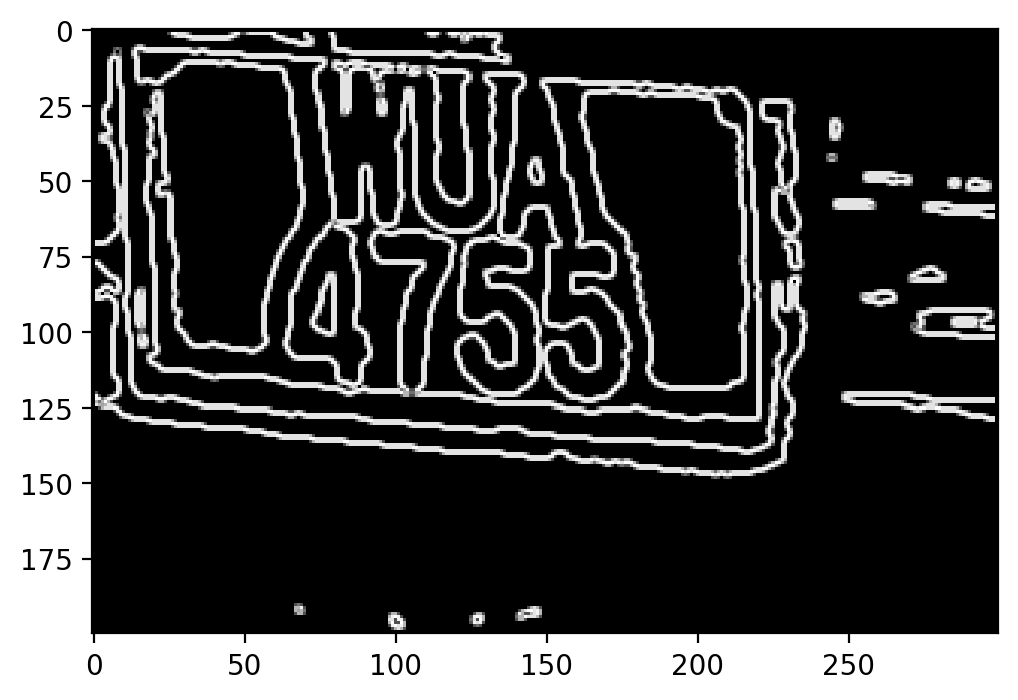

In [124]:
plt.imshow(sobel)

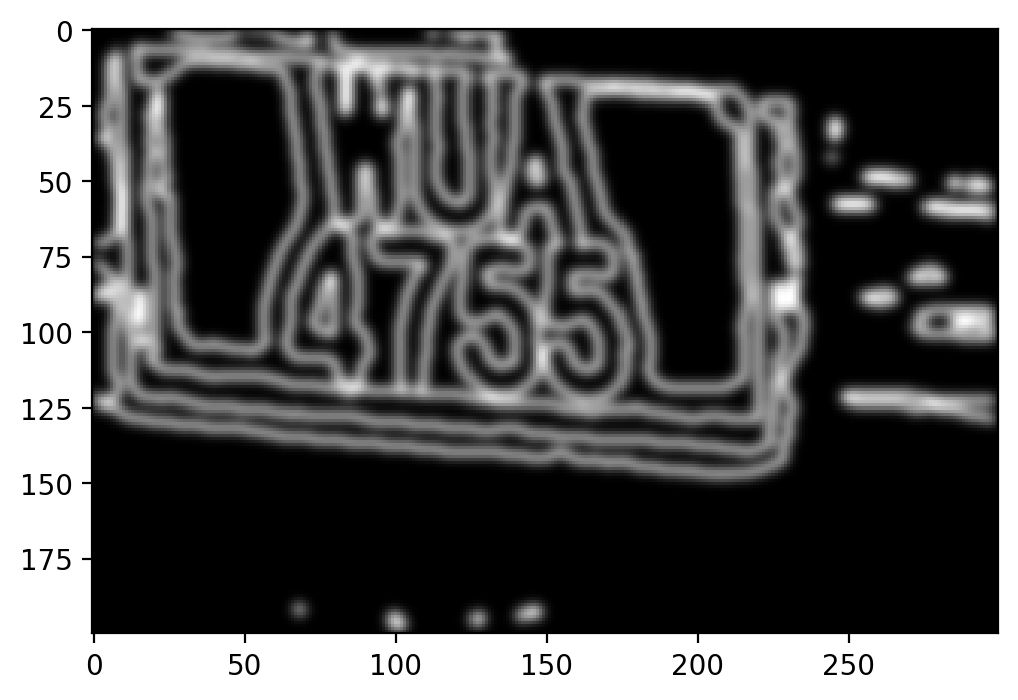

In [125]:
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)

In [126]:
import numpy as np
light_spots = np.array((img > 245).nonzero()).T

In [127]:
light_spots.shape

(90, 3)

Text(0.5, 1.0, 'light spots in image')

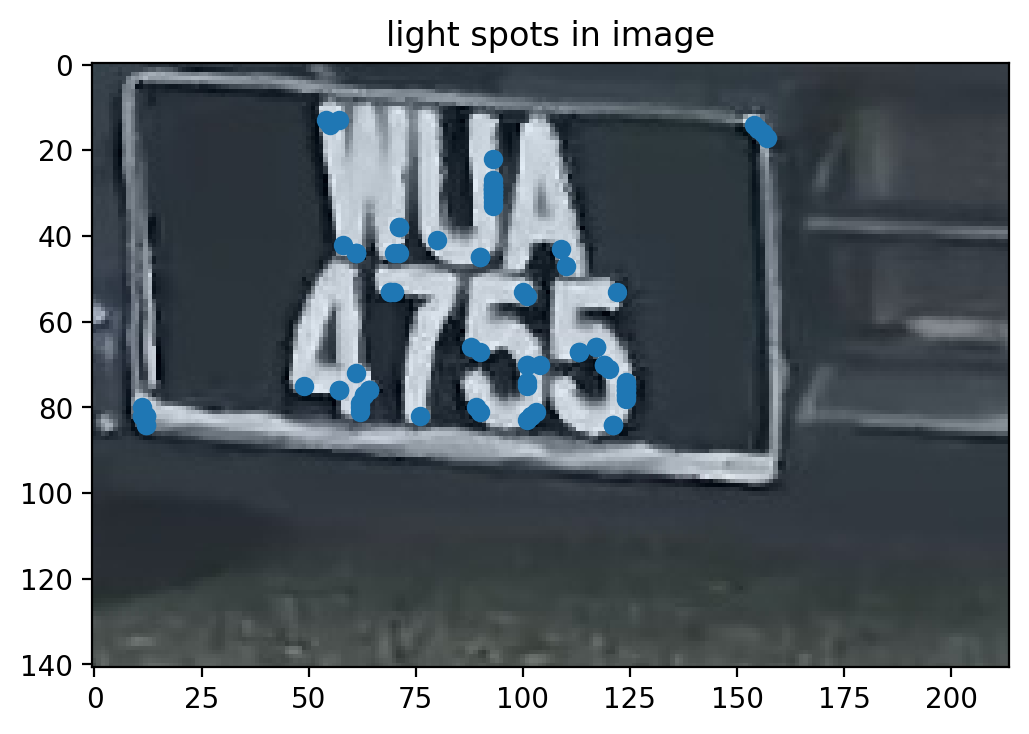

In [128]:
plt.plot(light_spots[:, 1], light_spots[:, 0], 'o')
plt.imshow(img)
plt.title('light spots in image')

In [129]:
dark_spots = np.array((img < 3).nonzero()).T

In [130]:
dark_spots.shape

(77, 3)

Text(0.5, 1.0, 'dark spots in image')

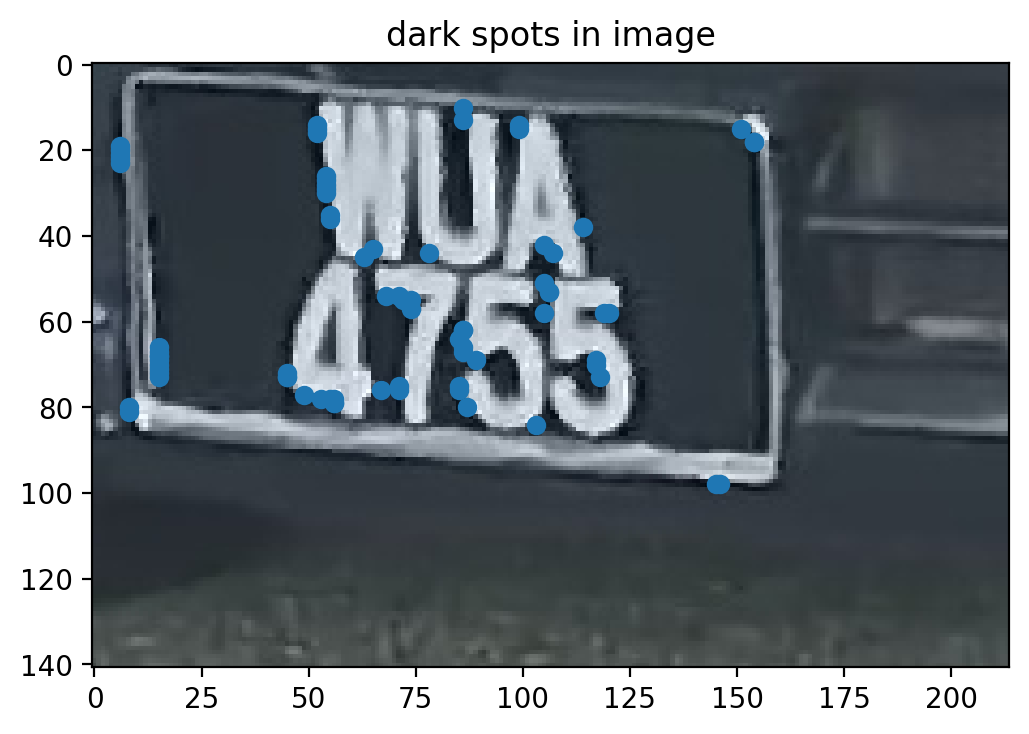

In [131]:
plt.plot(dark_spots[:, 1], dark_spots[:, 0], 'o')
plt.imshow(img)
plt.title('dark spots in image')

In [132]:
from scipy import ndimage as ndi
bool_mask = np.zeros(img.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds

89

In [133]:
from skimage import morphology
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

ValueError: operands could not be broadcast together with shapes (141,214,3) (200,300) 

In [134]:
background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

1

In [135]:
background_mask = (ws == background)

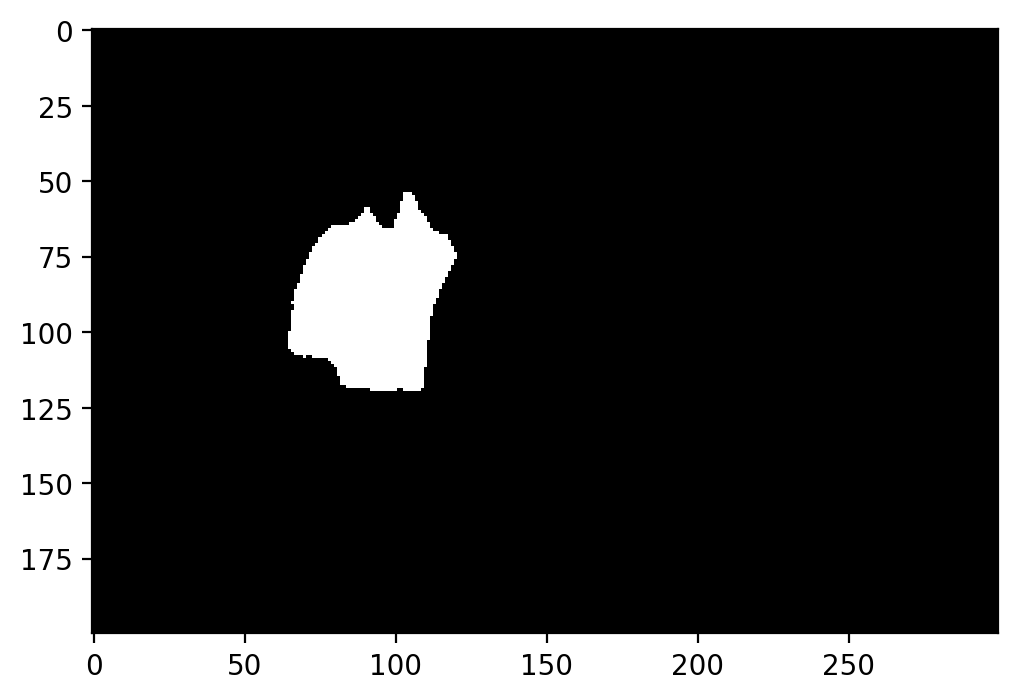

In [136]:
plt.imshow(~background_mask)

In [139]:
cleaned = img * ~background_mask
plt.imshow(cleaned)

ValueError: operands could not be broadcast together with shapes (141,214,3) (200,300) 

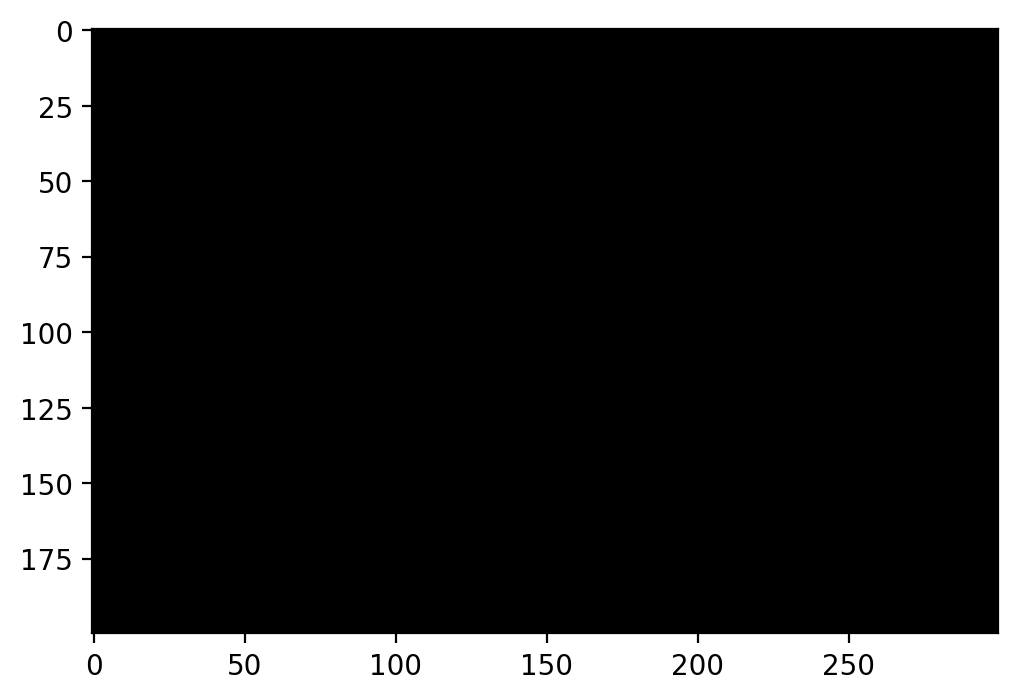

In [140]:
plt.imshow(cleaned, cmap='gray')
plt.imshow(background_mask.reshape(background_mask.shape +(1,)) * np.array([1, 0, 0, 1]))

In [141]:
def draw_group_as_background(ax, group, watershed_result, original_image):
    "Draws a group from the watershed result as red background."
    background_mask = (watershed_result == group)
    cleaned = original_image * ~background_mask
    ax.imshow(cleaned, cmap='gray')
    ax.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

In [142]:
background_candidates = sorted(set(ws.ravel()), key=lambda g: np.sum(ws == g), reverse=True)

ValueError: operands could not be broadcast together with shapes (141,214,3) (200,300) 

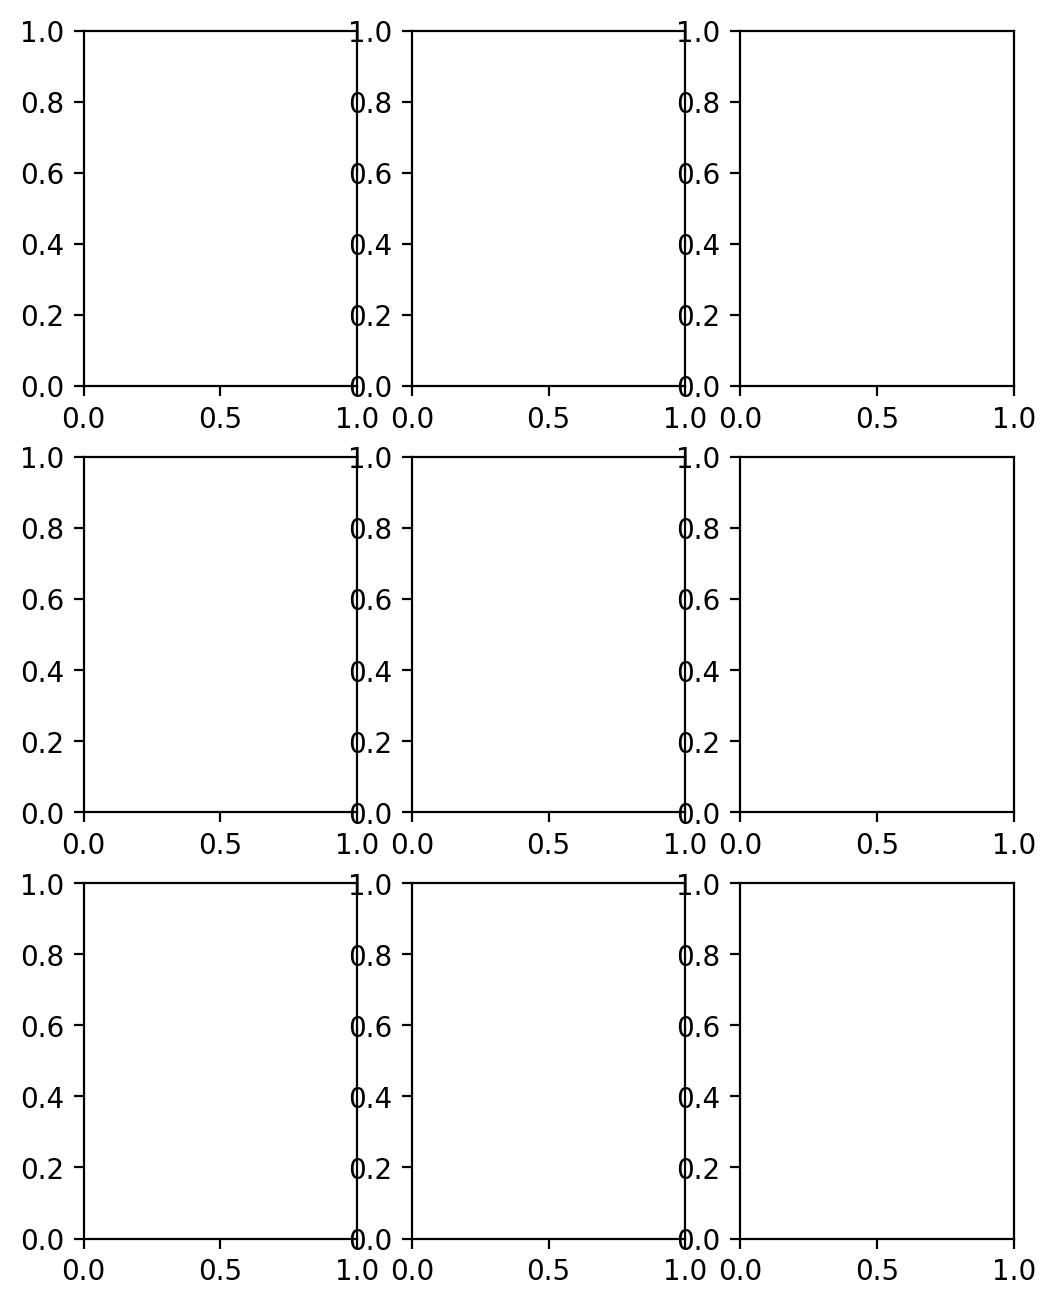

In [143]:
N = 3
fig, axes = plt.subplots(N, N, figsize=(6, 8))
for i in range(N*N):
    draw_group_as_background(axes.ravel()[i], background_candidates[i], ws, img)
plt.tight_layout()

In [144]:
seed_mask = np.zeros(img.shape, dtype=np.int)
seed_mask[0, 0] = 1 # background
seed_mask[100, 100] = 2 # foreground
# seed_mask.shape

In [145]:
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

ValueError: operands could not be broadcast together with shapes (141,214,3) (200,300) 

ValueError: operands could not be broadcast together with shapes (141,214,3) (200,300) 

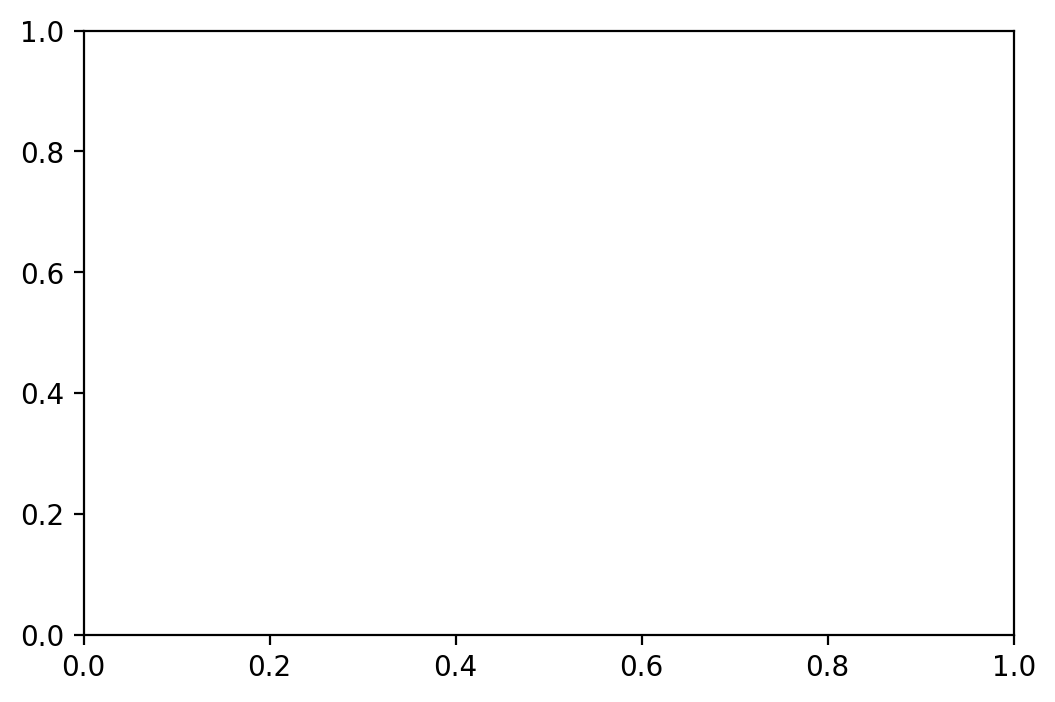

In [146]:

fig, ax = plt.subplots()
draw_group_as_background(ax, 1, ws, img)

In [166]:
def process_image_for_ocr(path):

    img = cv2.imread(path, 0)
    _, blackAndWhite = cv2.threshold(img, 127, 200, cv2.THRESH_BINARY_INV)
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 4,
                                                                         cv2.CV_32S)
    sizes = stats[1:, -1]  # get CC_STAT_AREA component
    img2 = np.zeros((labels.shape), np.uint8)
    for i in range(0, nlabels - 1):
        if sizes[i] >= 7:  # filter small dotted regions
            img2[labels == i + 1] = 255

    # blur = cv2.blur( img, (3, 3) )
    res = cv2.bitwise_not(img2)
    ad = cv2.adaptiveThreshold(res, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)
    adjusted = cv2.GaussianBlur(ad, (3, 3), 0)
    adjusted = adjust_gamma( adjusted )


    outpath = path.replace(".png","_processed.png")

    cv2.imwrite(outpath, adjusted)
    return outpath

def adjust_gamma(image, gamma=0.9):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    #0.9
    invGamma = 1.0 / gamma
    table = np.array( [((i / 255.0) ** invGamma) * 255
                       for i in np.arange( 0, 256 )] ).astype( "uint8" )

    # apply gamma correction using the lookup table
    return cv2.LUT( image, table )
process_image_for_ocr('new.png')

'new_processed.png'

NameError: name 'path' is not defined